# Assignment 8
Using any dataset that has a categorical feature that needs to be predicted, use several algorithms, preprocessing techniques, feature extraction techniques to fit the data to the model and show the accuracy, confusion matrix, and the classification report. G
https://www.kaggle.com/ntnu-testimon/paysim1
https://www.kaggle.com/joniarroba/noshowappointments
https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, preprocessing, metrics
from sklearn.preprocessing import scale, LabelEncoder, OneHotEncoder, StandardScaler
import pandas as pd
from pandas import Series, DataFrame
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.linear_model import LogisticRegression as Model



In [3]:
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

from sklearn import cross_validation

/Users/user/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Dataset: Medical Appointment No Show

#### *This dataset, made available on kaggle.com, looks at 15 variables across 300,000 medical appointments.  The goal is to predict if a patient is a no-show to their appointment.  I chose this dataset because it had 15 attributes (varying in data types) and thought it would be an interesting problem...and there would be some munging that would need to be done (e.g., parsing out time of appointment, converting strings to numerical values). I have in the past completely missed appointments because I completely forgot I had one scheduled.*  

In [4]:
#read in dataset

appt = pd.read_csv('/Users/user/Desktop/NoShows.csv')
appt.dropna(inplace=True) #discards all na values

In [5]:
list(appt.columns)

['Age',
 'Gender',
 'AppointmentRegistration',
 'ApointmentData',
 'DayOfTheWeek',
 'Status',
 'Diabetes',
 'Alcoolism',
 'HiperTension',
 'Handcap',
 'Smokes',
 'Scholarship',
 'Tuberculosis',
 'Sms_Reminder',
 'AwaitingTime']

In [6]:
appt.dtypes

Age                         int64
Gender                     object
AppointmentRegistration    object
ApointmentData             object
DayOfTheWeek               object
Status                     object
Diabetes                    int64
Alcoolism                   int64
HiperTension                int64
Handcap                     int64
Smokes                      int64
Scholarship                 int64
Tuberculosis                int64
Sms_Reminder                int64
AwaitingTime                int64
dtype: object

In [7]:
#noticed a few spelling errors in the file and perhaps better naming conventions for the column.  
#This converts the current column names to more useful ones.

appt.rename(columns = {'AppointmentRegistration':'Scheduled', 
                      'ApointmentData':'Appointment',
                      'Alcoolism':'Alcoholism',
                      'HiperTension':'HyperTension',
                      'Handcap':'Handicap', 
                      'Scholarship':'Aid Recipient',
                      'AwaitingTime':'DaysBetween'}, inplace=True)


In [8]:
list(appt.columns)

['Age',
 'Gender',
 'Scheduled',
 'Appointment',
 'DayOfTheWeek',
 'Status',
 'Diabetes',
 'Alcoholism',
 'HyperTension',
 'Handicap',
 'Smokes',
 'Aid Recipient',
 'Tuberculosis',
 'Sms_Reminder',
 'DaysBetween']

#### convert strings to numeric. Will do this for gender, dayoftheweek, and status

In [9]:
#figure out what values exist in the feature: gender
appt['Gender'].unique()

array(['M', 'F'], dtype=object)

In [10]:
#use a loop to convert M, F to 0, 1 (note: tried using LabelEncoder, it didn't seem to do the function I wanted it to do, which was number then apply as a new column)

def num_Gender(Gender):
    if Gender == "M":
        return 0
    elif Gender == "F":
        return 1

#add it to the dataframe
appt.Gender.apply(num_Gender).head
appt['NumGender'] = appt.Gender.apply(num_Gender)



In [11]:
#figure out what values exist for dayoftheweek
appt['DayOfTheWeek'].unique()

array(['Wednesday', 'Tuesday', 'Thursday', 'Friday', 'Monday', 'Saturday',
       'Sunday'], dtype=object)

In [12]:
#converted day of the week to numeric using a loop (to control the assignment of numbers)


def num_Weekday(DayOfTheWeek):
    if DayOfTheWeek == "Sunday":
        return 1
    elif DayOfTheWeek == "Monday":
        return 2
    elif DayOfTheWeek == "Tuesday":
        return 3
    elif DayOfTheWeek == "Wednesday":
        return 4
    elif DayOfTheWeek == "Thursday":
        return 5
    elif DayOfTheWeek == "Friday":
        return 6
    elif DayOfTheWeek == "Saturday":
        return 7
    
#add it to the dataframe
appt.DayOfTheWeek.apply(num_Weekday).head
appt['Weekday'] = appt.DayOfTheWeek.apply(num_Weekday)


In [13]:
#figure out what values exist for status (should be only 2)

appt['Status'].unique()

array(['Show-Up', 'No-Show'], dtype=object)

In [14]:
#convert to a numeric value

def num_Status(Status):
    if Status == "No-Show":
        return 0
    elif Status == "Show-Up":
        return 1
    
#add it to the dataframe
appt.Status.apply(num_Status).head
appt['NumStatus'] = appt.Status.apply(num_Status)



#### Now relook at the new(er) dataset

In [15]:
appt.head()

,Age,Gender,Scheduled,Appointment,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handicap,Smokes,Aid Recipient,Tuberculosis,Sms_Reminder,DaysBetween,NumGender,Weekday,NumStatus
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29,0,4,1
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1,1,4,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1,1,3,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,0,5,1
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6,0,3,1


#### Convert and parse out date, time values in Scheduled and Appointment columns.

In [16]:
#split the Scheduled column (i.e., turn 2014-12-16T14:46:25Z to 2014-12-16 14 46 25 using x.split)

def parsed_Scheduled(Scheduled):
    for letter in Scheduled:
        if letter == "T":
            Scheduled = Scheduled.replace(letter," ")
        elif letter == "Z":
            Scheduled = Scheduled.replace(letter,"")
    return Scheduled

def parsed_Appointment(Appointment):
    for letter in Appointment:
        if letter == "T":
            Appointment = Appointment.replace(letter," ")
        elif letter == "Z":
            Appointment = Appointment.replace(letter,"")
    return Appointment

In [17]:
#add it to the dataframe
appt.Scheduled.apply(parsed_Scheduled).head
appt['ParsedScheduled'] = appt.Scheduled.apply(parsed_Scheduled)
appt.Appointment.apply(parsed_Appointment).head
appt['ParsedAppointment'] = appt.Appointment.apply(parsed_Appointment)



In [18]:

#split off information in appointment
appt[['AppointmentDate', 'AppointmentTime']] = pd.DataFrame([ x.split(' ') for x in appt['ParsedAppointment'].tolist() ])

appt[['AppointmentYear', 'AppointmentMonth', 'AppointmentDay']] = pd.DataFrame([ x.split('-') for x in appt['AppointmentDate'].tolist() ])

In [19]:
#now split the Scheduled Date and Time
appt[['ScheduledDate', 'ScheduledTime']] = pd.DataFrame([ x.split(' ') for x in appt['ParsedScheduled'].tolist() ])


In [20]:
#now split ScheduledDate and ScheduledTime, to allow for more refined investigation (hypothesis: perhaps the hour it was scheduled affects people remembering the appointment)

appt[['ScheduledYear', 'ScheduledMonth', 'ScheduledDay']] = pd.DataFrame([ x.split('-') for x in appt['ScheduledDate'].tolist() ])

appt[['ScheduledHour', 'ScheduledMinute', 'ScheduledSecond']] = pd.DataFrame([ x.split(':') for x in appt['ScheduledTime'].tolist() ])

appt.head()

,Age,Gender,Scheduled,Appointment,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handicap,...,AppointmentMonth,AppointmentDay,ScheduledDate,ScheduledTime,ScheduledYear,ScheduledMonth,ScheduledDay,ScheduledHour,ScheduledMinute,ScheduledSecond
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,...,01,14,2014-12-16,14:46:25,2014,12,16,14,46,25
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,...,08,19,2015-08-18,07:01:26,2015,08,18,07,01,26
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,...,02,18,2014-02-17,12:53:46,2014,02,17,12,53,46
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,...,08,07,2014-07-23,17:02:11,2014,07,23,17,02,11
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,...,10,27,2015-10-21,15:20:09,2015,10,21,15,20,09


**Note:** Apparently there is no useful time stamp on the Appointment time (likely because the default was 00:00:00Z)

In [21]:
#now we should convert the Days Between appointment Scheduled and Appointment Date to absolute values (instead of negative integers)

abs_DaysBetween = appt.DaysBetween.abs()

#add it to the dataframe
appt['Abs_DaysBetween'] = abs_DaysBetween
appt.head()

,Age,Gender,Scheduled,Appointment,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handicap,...,AppointmentDay,ScheduledDate,ScheduledTime,ScheduledYear,ScheduledMonth,ScheduledDay,ScheduledHour,ScheduledMinute,ScheduledSecond,Abs_DaysBetween
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,...,14,2014-12-16,14:46:25,2014,12,16,14,46,25,29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,...,19,2015-08-18,07:01:26,2015,08,18,07,01,26,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,...,18,2014-02-17,12:53:46,2014,02,17,12,53,46,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,...,07,2014-07-23,17:02:11,2014,07,23,17,02,11,15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,...,27,2015-10-21,15:20:09,2015,10,21,15,20,09,6


In [22]:
appt.dtypes

Age                   int64
Gender               object
Scheduled            object
Appointment          object
DayOfTheWeek         object
Status               object
Diabetes              int64
Alcoholism            int64
HyperTension          int64
Handicap              int64
Smokes                int64
Aid Recipient         int64
Tuberculosis          int64
Sms_Reminder          int64
DaysBetween           int64
NumGender             int64
Weekday               int64
NumStatus             int64
ParsedScheduled      object
ParsedAppointment    object
AppointmentDate      object
AppointmentTime      object
AppointmentYear      object
AppointmentMonth     object
AppointmentDay       object
ScheduledDate        object
ScheduledTime        object
ScheduledYear        object
ScheduledMonth       object
ScheduledDay         object
ScheduledHour        object
ScheduledMinute      object
ScheduledSecond      object
Abs_DaysBetween       int64
dtype: object

In [23]:
#odd that the numerical features I created turned out into object, let's fix that...
appt["AppointmentYear"] = pd.to_numeric(appt["AppointmentYear"], errors="coerce").fillna(0).astype("int64")
appt["AppointmentMonth"] = pd.to_numeric(appt["AppointmentMonth"], errors="coerce").fillna(0).astype("int64")
appt["AppointmentDay"] = pd.to_numeric(appt["AppointmentDay"], errors="coerce").fillna(0).astype("int64")
appt["ScheduledHour"] = pd.to_numeric(appt["ScheduledHour"], errors="coerce").fillna(0).astype("int64")
appt["ScheduledMinute"] = pd.to_numeric(appt["ScheduledMinute"], errors="coerce").fillna(0).astype("int64")
appt["ScheduledSecond"] = pd.to_numeric(appt["ScheduledSecond"], errors="coerce").fillna(0).astype("int64")
appt["ScheduledYear"] = pd.to_numeric(appt["ScheduledYear"], errors="coerce").fillna(0).astype("int64")
appt["ScheduledMonth"] = pd.to_numeric(appt["ScheduledMonth"], errors="coerce").fillna(0).astype("int64")
appt["ScheduledDay"] = pd.to_numeric(appt["ScheduledDay"], errors="coerce").fillna(0).astype("int64")

#Not all features need to be changed from objects to numeric because I don't plan on using them for the analysis.

In [24]:
#see which columns are numeric

num_columns = [col for col, dtype in zip(appt.columns, appt.dtypes) if dtype != 'object']
num_columns


['Age',
 'Diabetes',
 'Alcoholism',
 'HyperTension',
 'Handicap',
 'Smokes',
 'Aid Recipient',
 'Tuberculosis',
 'Sms_Reminder',
 'DaysBetween',
 'NumGender',
 'Weekday',
 'NumStatus',
 'AppointmentYear',
 'AppointmentMonth',
 'AppointmentDay',
 'ScheduledYear',
 'ScheduledMonth',
 'ScheduledDay',
 'ScheduledHour',
 'ScheduledMinute',
 'ScheduledSecond',
 'Abs_DaysBetween']

In [25]:
len(num_columns)

23

In [26]:
appt.head()

,Age,Gender,Scheduled,Appointment,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handicap,...,AppointmentDay,ScheduledDate,ScheduledTime,ScheduledYear,ScheduledMonth,ScheduledDay,ScheduledHour,ScheduledMinute,ScheduledSecond,Abs_DaysBetween
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,...,14,2014-12-16,14:46:25,2014,12,16,14,46,25,29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,...,19,2015-08-18,07:01:26,2015,8,18,7,1,26,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,...,18,2014-02-17,12:53:46,2014,2,17,12,53,46,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,...,7,2014-07-23,17:02:11,2014,7,23,17,2,11,15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,...,27,2015-10-21,15:20:09,2015,10,21,15,20,9,6


#### Horray! Now we have parsed out data, formatted, and ready to analyze...with 23 features to play with.

## Exploring the data (getting a better feel for how it's distributed, etc)

##### (1) How many times have we observed a missed appointment in the dataset?

In [27]:
appt.Status.value_counts()

Show-Up    209269
No-Show     90731
Name: Status, dtype: int64

**Observation:** According to the Status feature, patients miss the appointment 43% of the time!  That's shockingly high (and I guess creates quite a bit of revenue for a clinic).

##### (2) Which day is the most frequent for appointments?

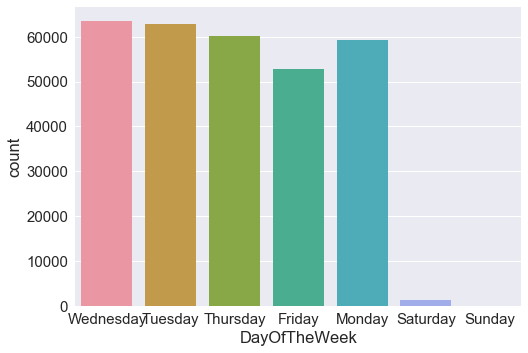

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

sns.countplot(x='DayOfTheWeek', data=appt)

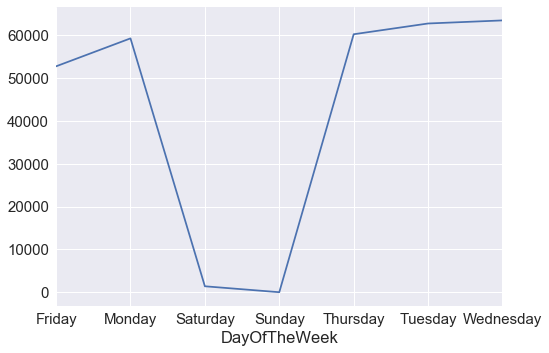

In [29]:
#This is another way to view the above information.
#The line graph makes it a little easier to see the division between the days

days = appt.groupby('DayOfTheWeek').agg('count')
days['Day'] = days.index

days.Weekday.plot()

**Observation:** It appears that all of the weekdays are quite popular with Wednesday being the most and Friday as the least.  Wednesday and Tuesday appear to be very close. There are probably only a few places open on Saturday, which is why we see some values.

##### (3) What time is the most popular for scheduling?  (by hour and month)

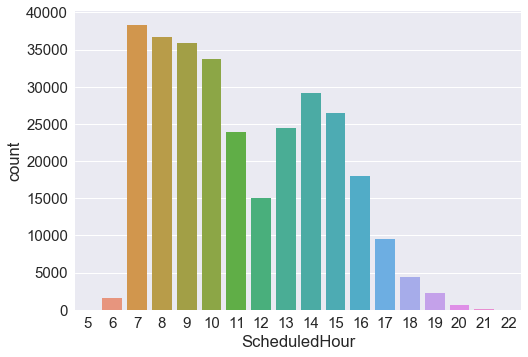

In [30]:
sns.countplot(x='ScheduledHour', data=appt)

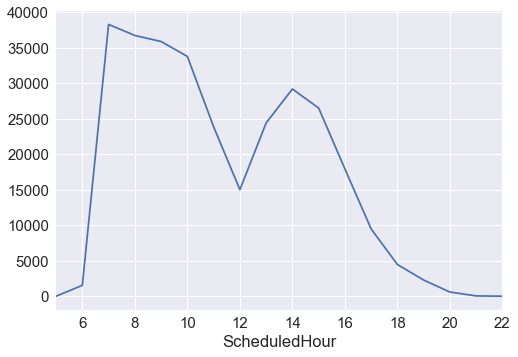

In [31]:

hours = appt.groupby('ScheduledHour').agg('count')
hours['Hour'] = hours.index

hours.Scheduled.plot()

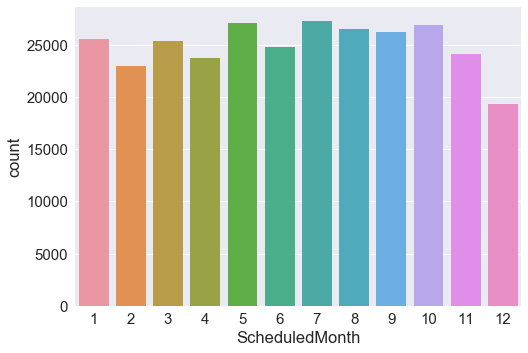

In [32]:
sns.countplot(x='ScheduledMonth', data=appt)

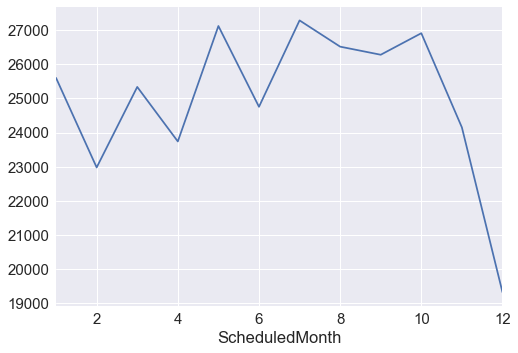

In [33]:
schedmonth = appt.groupby('ScheduledMonth').agg('count')
schedmonth['Month'] = schedmonth.index

schedmonth.Scheduled.plot()

##### How about for appointments? (Month only because hour is nonexistent)


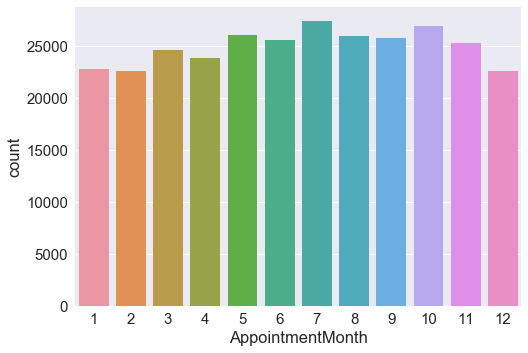

In [34]:
sns.countplot(x='AppointmentMonth', data=appt)

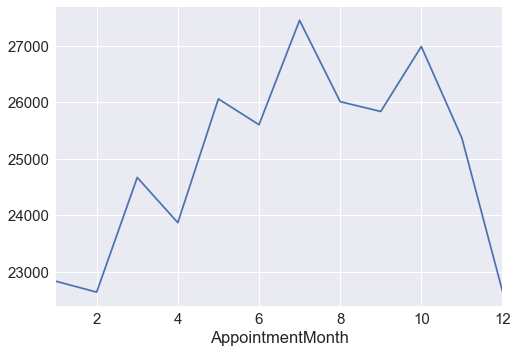

In [35]:

apptmonth = appt.groupby('AppointmentMonth').agg('count')
apptmonth['Month'] = apptmonth.index

apptmonth.Appointment.plot()

**Observation:** It appears that the most popular time for scheduling appointments is early in the morning or in the midafternoon.  The most popular month for scheduling these appointments (though there's not a ton of deviation) is May and July-October.  The appointment dates roughly follow the scheduling dates.

Plotting these features in multiple ways makes it easier to see where we can parse the data for our algorithms. I will probably take a subset of information based on either day of the appointment, or popular appointment months/hours. This will help us compute through the data.

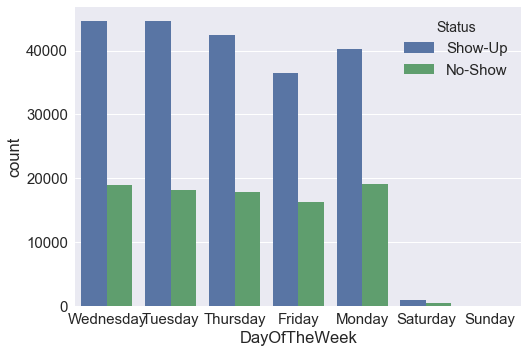

In [36]:
sns.countplot(x="DayOfTheWeek", hue='Status', data=appt)

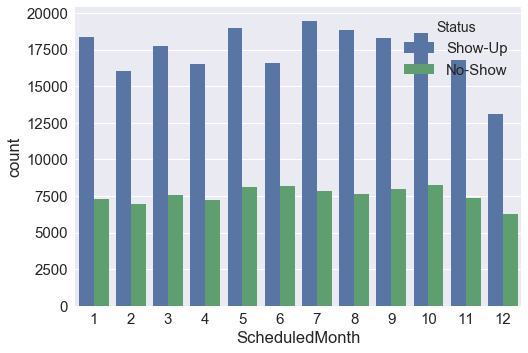

In [37]:
sns.countplot(x="ScheduledMonth", hue='Status', data=appt)

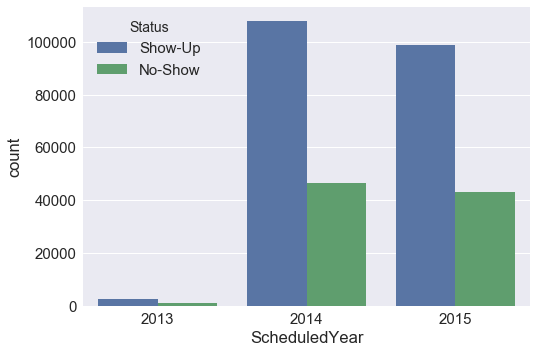

In [38]:
sns.countplot(x="ScheduledYear", hue='Status', data=appt)

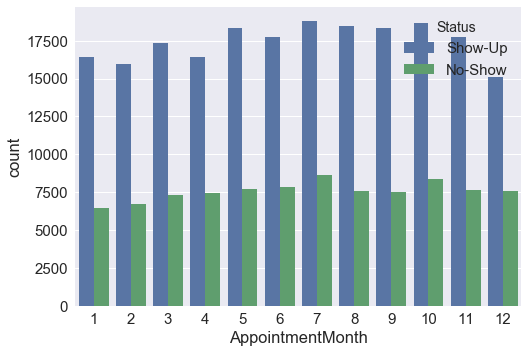

In [39]:
sns.countplot(x="AppointmentMonth", hue='Status', data=appt)

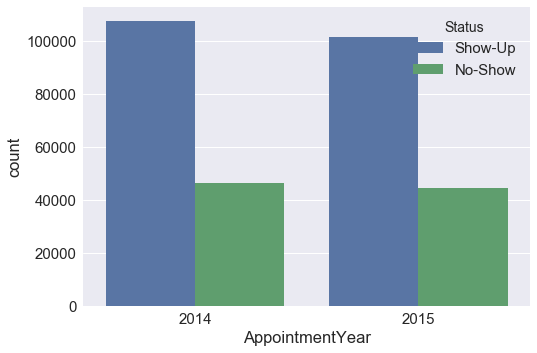

In [40]:
sns.countplot(x="AppointmentYear", hue='Status', data=appt)

**Observation:** Even when parsing out by Status, it shows a relatively consistent change in status throughout the year. Does this mean that each month a little less than half of the scheduled patients don't show up to their appointments? (also need to discard 2013 ScheduledYear information, because there's too little data for that time)

##### (4) Let's take a look at the data by looking at how the the status is affected by the days between the scheduling and the appointment.  Are there points in time where this is more likely to occur?

In [41]:
max(appt.Abs_DaysBetween)


398

In [42]:
min(appt.Abs_DaysBetween)

1

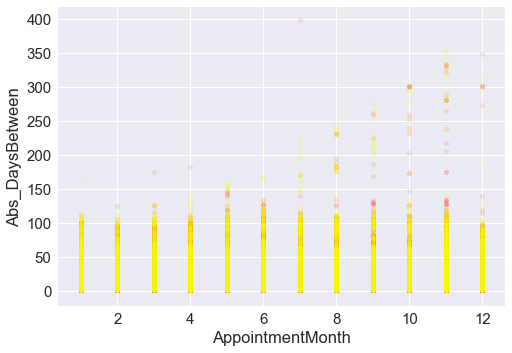

In [43]:
fig, ax = plt.subplots()
#remember that 0 is no-show and 1 is a show-up
appt[appt.NumStatus==0].plot(kind='scatter', x='AppointmentMonth', y='Abs_DaysBetween', color='red', alpha=0.1, ax=ax)
appt[appt.NumStatus==1].plot(kind='scatter', x='AppointmentMonth', y='Abs_DaysBetween', color='yellow', alpha=0.1, ax=ax)

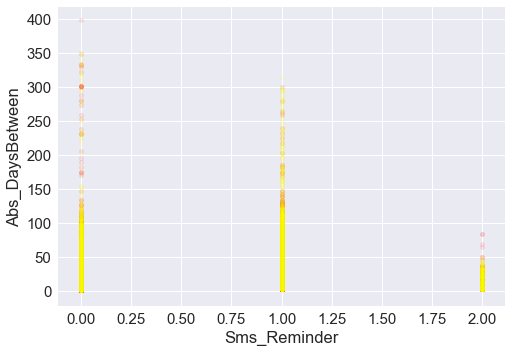

In [44]:
fig, ax = plt.subplots()
#remember that 0 is no-show and 1 is a show-up
appt[appt.NumStatus==0].plot(kind='scatter', x='Sms_Reminder', y='Abs_DaysBetween', color='red', alpha=0.1, ax=ax)
appt[appt.NumStatus==1].plot(kind='scatter', x='Sms_Reminder', y='Abs_DaysBetween', color='yellow', alpha=0.1, ax=ax)

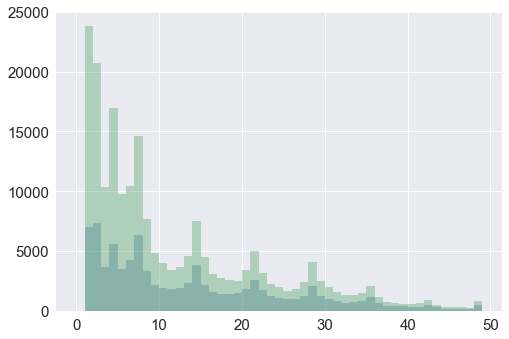

In [45]:
appt[appt.NumStatus==0].Abs_DaysBetween.hist(bins=np.arange(0,50,1), alpha=.4) #dark green, no-show
appt[appt.NumStatus==1].Abs_DaysBetween.hist(bins=np.arange(0,50,1), alpha=.4) #light green, show-up


**Observation:** So it appears that the longer the time passes between the scheduling of an appointment and the appointment date, the more likely folks are to miss their appointment. The second plot clearly shows that the text message reminders are more effective and probably encourage people to schedule these visits more frequently? The third plot shows the ratio between those who show up and those who do not. Porportionally there seems to be a greater probability of folks not showing up to their appointment the further apart the scheduled date is from the appointment date.


## Data Analysis:  Building a Model to Predict No-Shows

### incorporate accuracy score, classification, and confusion matrix

Given how the data is distributed when looking at it through various temporal features (scheduled hour, time between schedule and appointment, month of appointment), it appears that a SVM and a Linear Regression approach should be tried. 

Because this the dataset is so large, we will need to take a subset in order to run some of these models on less powerful computers.

In [46]:
#take randomly sampled rows from the dataset, 
#represents about 10% of the data (around 3000 rows)

rand_rows = np.random.choice(appt.index.values, 3000)

sampled_appt = appt.ix[rand_rows]

sampled_appt

,Age,Gender,Scheduled,Appointment,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handicap,...,AppointmentDay,ScheduledDate,ScheduledTime,ScheduledYear,ScheduledMonth,ScheduledDay,ScheduledHour,ScheduledMinute,ScheduledSecond,Abs_DaysBetween
276991,27,M,2015-08-06T09:52:24Z,2015-08-11T00:00:00Z,Tuesday,Show-Up,0,0,0,0,...,11,2015-08-06,09:52:24,2015,8,6,9,52,24,5
255164,15,M,2014-12-09T15:20:09Z,2014-12-10T00:00:00Z,Wednesday,Show-Up,0,0,0,0,...,10,2014-12-09,15:20:09,2014,12,9,15,20,9,1
137779,46,F,2015-05-13T07:11:25Z,2015-05-29T00:00:00Z,Friday,Show-Up,0,0,0,0,...,29,2015-05-13,07:11:25,2015,5,13,7,11,25,16
120739,55,F,2014-04-17T14:59:36Z,2014-04-29T00:00:00Z,Tuesday,Show-Up,0,0,1,0,...,29,2014-04-17,14:59:36,2014,4,17,14,59,36,12
294502,54,F,2014-04-15T08:49:29Z,2014-04-17T00:00:00Z,Thursday,Show-Up,0,0,1,0,...,17,2014-04-15,08:49:29,2014,4,15,8,49,29,2
43669,59,F,2015-04-07T09:59:53Z,2015-04-08T00:00:00Z,Wednesday,No-Show,0,0,1,0,...,8,2015-04-07,09:59:53,2015,4,7,9,59,53,1
195466,39,M,2014-11-06T12:42:15Z,2014-11-11T00:00:00Z,Tuesday,Show-Up,0,0,0,0,...,11,2014-11-06,12:42:15,2014,11,6,12,42,15,5
143453,64,F,2014-08-04T14:50:06Z,2014-08-11T00:00:00Z,Monday,Show-Up,0,0,1,0,...,11,2014-08-04,14:50:06,2014,8,4,14,50,6,7
93891,0,M,2015-10-15T13:23:02Z,2015-10-19T00:00:00Z,Monday,No-Show,0,0,0,0,...,19,2015-10-15,13:23:02,2015,10,15,13,23,2,4
45679,67,F,2013-12-30T14:32:08Z,2014-01-03T00:00:00Z,Friday,Show-Up,0,0,0,0,...,3,2013-12-30,14:32:08,2013,12,30,14,32,8,4


### SVM Model

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

import itertools

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets, metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [106]:
sampled_appt.dtypes

Age                   int64
Gender               object
Scheduled            object
Appointment          object
DayOfTheWeek         object
Status               object
Diabetes              int64
Alcoholism            int64
HyperTension          int64
Handicap              int64
Smokes                int64
Aid Recipient         int64
Tuberculosis          int64
Sms_Reminder          int64
DaysBetween           int64
NumGender             int64
Weekday               int64
NumStatus             int64
ParsedScheduled      object
ParsedAppointment    object
AppointmentDate      object
AppointmentTime      object
AppointmentYear       int64
AppointmentMonth      int64
AppointmentDay        int64
ScheduledDate        object
ScheduledTime        object
ScheduledYear         int64
ScheduledMonth        int64
ScheduledDay          int64
ScheduledHour         int64
ScheduledMinute       int64
ScheduledSecond       int64
Abs_DaysBetween       int64
dtype: object

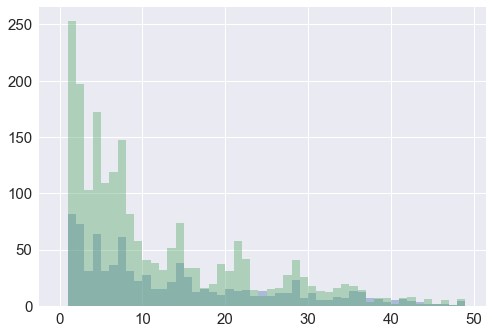

In [107]:
sampled_appt[sampled_appt.NumStatus==0].Abs_DaysBetween.hist(bins=np.arange(0,50,1), alpha=.4) #dark green, no-show
sampled_appt[sampled_appt.NumStatus==1].Abs_DaysBetween.hist(bins=np.arange(0,50,1), alpha=.4) #light green, show-up


### Model parameters:  Exploring the models by predicting "show status" given the appointment month and the days a patient waited after scheduling the appointment. 

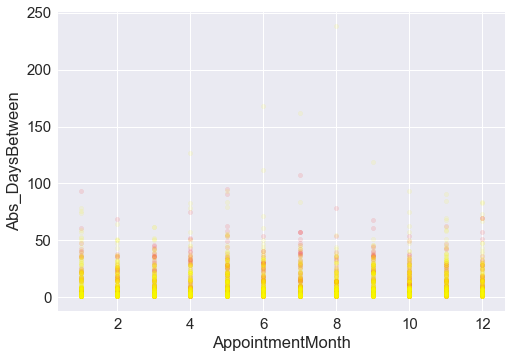

In [109]:
fig, ax = plt.subplots()
#remember that 0 is no-show and 1 is a show-up
sampled_appt[sampled_appt.NumStatus==0].plot(kind='scatter', x='AppointmentMonth', y='Abs_DaysBetween', color='red', alpha=0.1, ax=ax)
sampled_appt[sampled_appt.NumStatus==1].plot(kind='scatter', x='AppointmentMonth', y='Abs_DaysBetween', color='yellow', alpha=0.1, ax=ax)

**Observation:** It appears there's more missed appointments (in red dots) in the middle of the year, in the summer months.  Perhaps people forget as they make summer vacatin plans.

In [110]:
#creates a subplot...colored background

def plot_svm(i, clf, title, X, y, col1, col2):
    
    h = .2  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[col1].min() - 1, X[col1].max() + 1
    y_min, y_max = X[col2].min() - 1, X[col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_stack = np.stack([xx.flatten(), yy.flatten()]).T

    x1 = X[col1]
    x2 = X[col2]
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(scale(grid_stack)).reshape(xx.shape)
    # Put the result into a color plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    x_s = preprocessing.scale(X)

    # Plot also the training points
    plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)

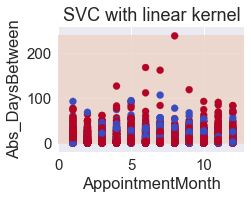

In [111]:
#lets build our inital model looking at the relationship
col1, col2 ='AppointmentMonth', 'Abs_DaysBetween'

X = sampled_appt[[col1, col2]]                    
y = sampled_appt['NumStatus']
# create a model to predict if a patient is a no-show.
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors

svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
# model = fitting

plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)


plt.show()

In [112]:
svc.score(X,y)

0.70633333333333337

In [113]:
#let's see what happens if we scaled X

X_scaled = preprocessing.scale(X)

svc = svm.SVC(kernel='linear', C=1.0).fit(X_scaled,y)

In [114]:
svc.score(X_scaled, y)



0.70633333333333337

**Observation:** Even with the scaled X, there was no difference in the accuracy result of our prediction (~71%).  Looking through the various kernels, these all clearly demonstrate that a patient more than likely to miss an appointment the more days inbetween the day they scheduled the visit and the appointment.

In [115]:
C=1.0
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)


In [116]:
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_scaled, y)



In [117]:
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)

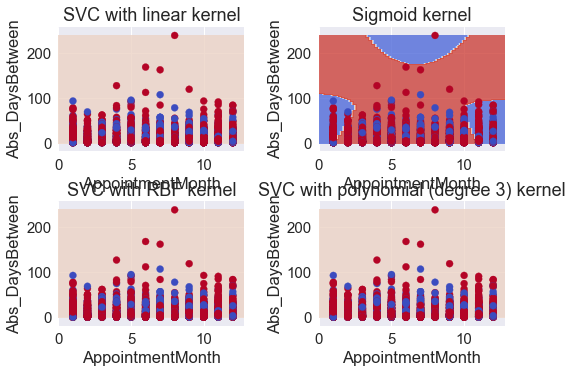

In [118]:
titles = ['SVC with linear kernel',
          'Sigmoid kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, sig_svc, rbf_svc, poly_svc)):
    plot_svm(i, clf, titles[i], X, y, col1, col2)

plt.show()


### Confusion Matrix

In [119]:
X = sampled_appt[[col1, col2]]
y = sampled_appt['NumStatus']

ShowUp = sampled_appt.NumStatus

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [134]:
classifier = sig_svc
y_pred = classifier.fit(X_train, y_train).predict(X_test)

[[  8 206]
 [ 27 509]]


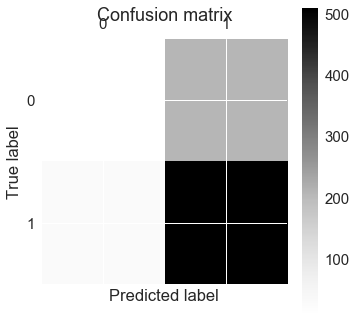

In [135]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Observation:** This doesn't seem like useful results, if the values as as follows:

 * True Positive: 8
 * False Negative: 206
 * False Positive: 27
 * True Negative: 509

Perhaps SVMs are not the best model for this data. 

### Applying a Linear Regression Model

#### Using Appointment Month and Abs_DaysBetween as predictors for Show Status.

In [136]:
col1, col2 =  'AppointmentMonth', 'Abs_DaysBetween'

X = sampled_appt[[col1, col2]]                    
y = sampled_appt['NumStatus']

#employing a 60/40 split. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [137]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([-0.00468625, -0.00233911]), 0.76069756893702356)

In [138]:
model = LinearRegression()
model.fit(X_test, y_test)
model.coef_, model.intercept_

(array([  2.15115928e-05,  -1.31149316e-03]), 0.73547071141875986)

In [139]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, np.dot(X_train, model.coef_) + model.intercept_)

0.20990210962247205

In [140]:
mean_squared_error(y_test, np.dot(X_test, model.coef_) + model.intercept_)

0.20219414357586268

**Observation:** It appears when you look at the model's intercepts they are both in the same direction and not terribly far off (though certainly different numbers). Additionally the MSE's are relatively close. I guess it would be safe to say that the training set is useful for the test set. 

### Applying a Logistic Regression Model

In [142]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.metrics import *
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

cross_validation.cross_val_score(model, X, y, cv=10)

array([ 0.70099668,  0.7       ,  0.70666667,  0.70333333,  0.70666667,
        0.70666667,  0.70333333,  0.70333333,  0.70666667,  0.70568562])

In [143]:
#model using Appointment Month and Abs_DaysBetween

feature_cols = ['AppointmentMonth', 'Abs_DaysBetween']
X = sampled_appt[feature_cols]
y = sampled_appt.NumStatus

model = Model()
model.fit(X, y)
sampled_appt['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(sampled_appt.NumStatus, sampled_appt.pred.round())


/Users/user/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.70466666666666666

**Observation:** It appears that a Logistic Regresion model has similar scores as our SVM model (around 71% prediction accuracy). Will try to add in additional features to see how that affects the model.

In [144]:
#see which columns are numeric in our sampled dataset

num_sampledcolumns = [col for col, dtype in zip(sampled_appt.columns, sampled_appt.dtypes) if dtype != 'object']
num_sampledcolumns

['Age',
 'Diabetes',
 'Alcoholism',
 'HyperTension',
 'Handicap',
 'Smokes',
 'Aid Recipient',
 'Tuberculosis',
 'Sms_Reminder',
 'DaysBetween',
 'NumGender',
 'Weekday',
 'NumStatus',
 'AppointmentYear',
 'AppointmentMonth',
 'AppointmentDay',
 'ScheduledYear',
 'ScheduledMonth',
 'ScheduledDay',
 'ScheduledHour',
 'ScheduledMinute',
 'ScheduledSecond',
 'Abs_DaysBetween',
 'pred']

In [147]:
#model using Appointment Month, Abs_DaysBetween, Sms_Reminder

feature_cols = ['AppointmentMonth', 'Abs_DaysBetween', 'Sms_Reminder']
X = sampled_appt[feature_cols]
y = sampled_appt.NumStatus

model = Model()
model.fit(X, y)
sampled_appt['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(sampled_appt.NumStatus, sampled_appt.pred.round())

/Users/user/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.70466666666666666

In [148]:
#model using Appointment Month, Abs_DaysBetween, Sms_Reminder, Age

feature_cols = ['AppointmentMonth', 'Abs_DaysBetween', 'Sms_Reminder', 'Age']
X = sampled_appt[feature_cols]
y = sampled_appt.NumStatus

model = Model()
model.fit(X, y)
sampled_appt['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(sampled_appt.NumStatus, sampled_appt.pred.round())

/Users/user/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.70499999999999996

In [149]:
#model using Appointment Month, Abs_DaysBetween, Sms_Reminder, Age, Weekday of the appointment

feature_cols = ['AppointmentMonth', 'Abs_DaysBetween', 'Sms_Reminder', 'Age', 'Weekday']
X = sampled_appt[feature_cols]
y = sampled_appt.NumStatus

model = Model()
model.fit(X, y)
sampled_appt['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(sampled_appt.NumStatus, sampled_appt.pred.round())

/Users/user/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.70499999999999996

In [158]:
#model using Appointment Month, Abs_DaysBetween, Gender, and Weekday of Appointment

feature_cols = ['AppointmentMonth', 'Abs_DaysBetween', 'NumGender', 'Weekday']
X = sampled_appt[feature_cols]
y = sampled_appt.NumStatus

model = Model()
model.fit(X, y)
sampled_appt['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(sampled_appt.NumStatus, sampled_appt.pred.round())

/Users/user/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.70466666666666666

**Observation:** It appears that even with the various models, the most influential factors seem to be age and how many days a patient waited before their appointment. Even when adding in Sms_Reminders didn't seem to improve the accuracy score of the model. The model's accuracy score improved marginally, going from 70.46% to 70.49%, when age was incorporated. 

This suggests that the previous conclusions reached while we were exploring the dataset didn't hold as true as expected (i.e., that Sms_Reminders really influenced if a person was going to show up or not). 